In [467]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [468]:
with open(f'dataframes/{69}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.758231e+09,1.758231e+09,"[86.4, 84.8, 85.18, 85.11, 85.34, 85.26, 85.41...",915,1,5
1,Tag2,Tag1,1.758231e+09,1.758231e+09,"[28.27, 28.42, 28.27, 28.19, 28.95, 29.03, 28....",915,1,5


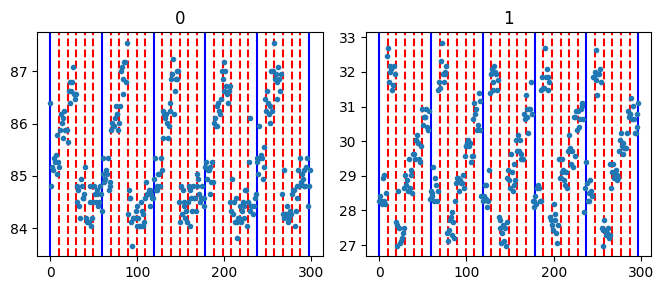

In [469]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(10,3))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [470]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[86.4, 84.8, 85.18, 85.11, 85.34, 85.26, 85.41...","[85.26, 84.99000000000001, 84.875, 85.11, 85.34]","[85.87, 85.985, 86.06, 86.215, 86.36500000000001]","[86.595, 86.935, 86.86, 86.71, 86.86]","[84.65, 84.22999999999999, 84.38, 84.305, 84.27]","[84.19, 84.19, 84.57, 84.38, 84.69]","[84.65, 84.65, 84.61, 84.46000000000001, 84.99...",915,1,5
1,Tag2,Tag1,"[28.27, 28.42, 28.27, 28.19, 28.95, 29.03, 28....","[28.27, 28.57, 28.42, 28.535, 28.685000000000002]","[32.045, 31.93, 31.855, 31.625, 31.855]","[27.425, 27.695, 27.5, 27.58, 27.39]","[28.805, 28.88, 28.994999999999997, 29.03, 29.07]","[29.755000000000003, 29.87, 29.72, 29.755, 29.91]","[30.71, 30.71, 30.865000000000002, 30.63, 30.71]",915,1,5
